# Graphs for stability


[-0.02727719 -0.02229232]
[ 0.00294212 -0.07140907  0.08068205]
[ 0.00450431 -0.09840486  0.5173043  -0.53415632]


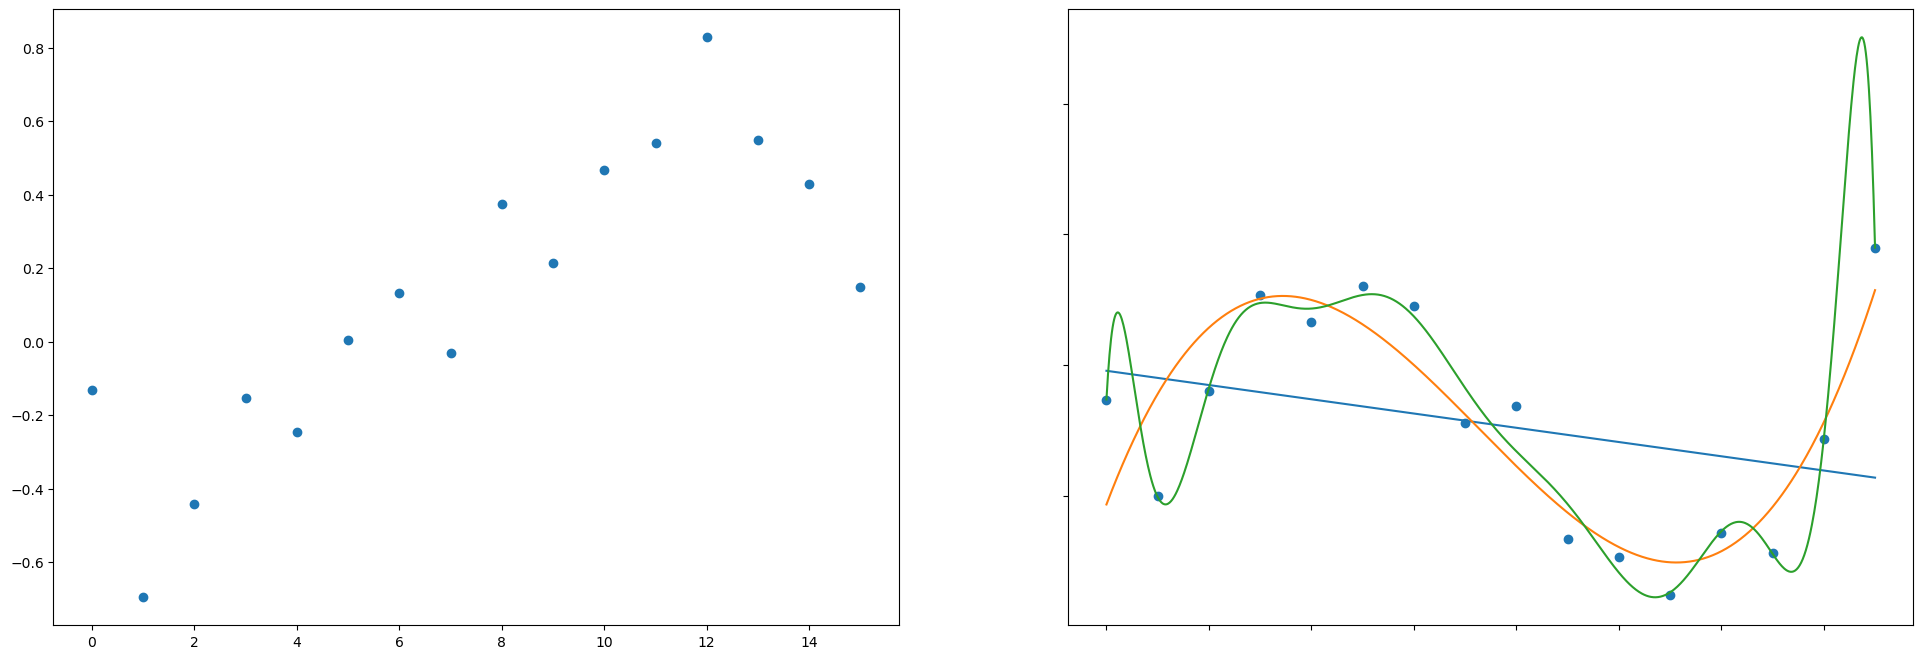

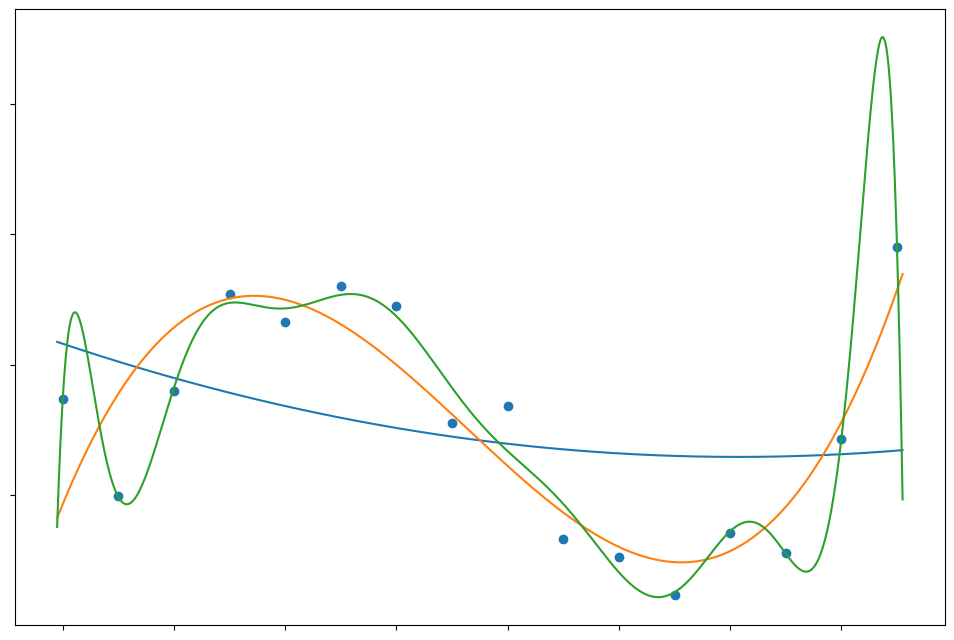

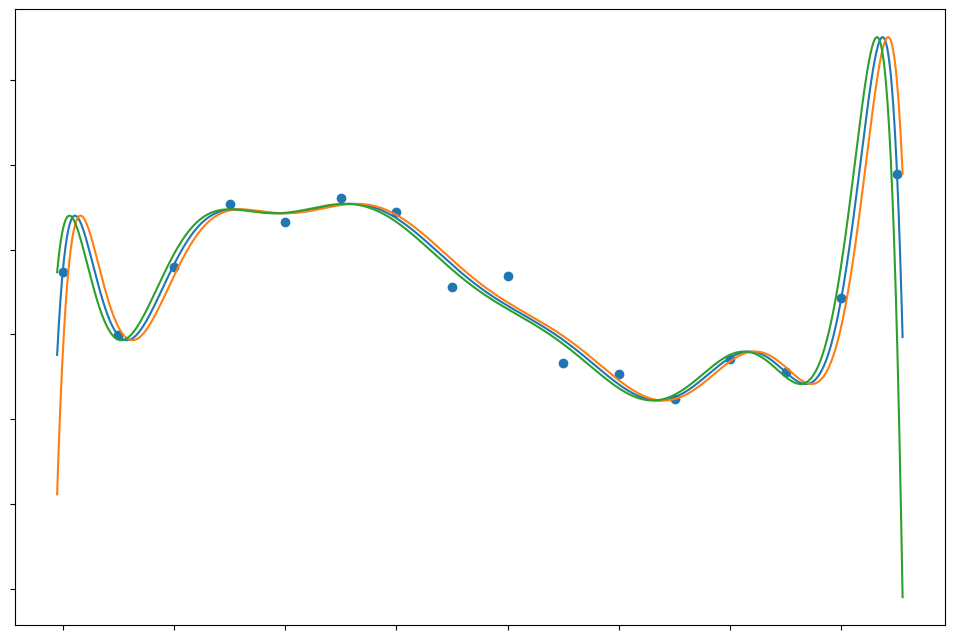

In [32]:
import matplotlib.pyplot as plt
# import random
import numpy as np
from scipy import interpolate

"""Generate Pink Noise"""
def gen_pink_noise_fs48k(length=2**17, rndseed=0):

    np.random.seed(rndseed)
    tmp = np.random.random(size=length)*2 - 1
    S = np.fft.rfft(tmp)
    fil = 1 / (np.arange(len(S))+1)
    S = S * fil
    s = np.fft.irfft(S)
    s /= np.max(np.abs(s))

    return s

t_noise = gen_pink_noise_fs48k()

"""pick up 32/16 points"""
# xs_noise = t_noise[::2**12]
xs_noise = t_noise[::2**13]
xs = np.array([i for i in range(len(xs_noise))])
a1 = 0.2
a2 = 1.0

"""target function w/ pink noise"""
ys = 0.3*(a1*xs)**4 - 1*(a1*xs)**3 + a1*xs + a2*xs_noise

fig, axes = plt.subplots(1,2, figsize=(24,8))
axes[0].scatter(xs, xs_noise)
axes[1].scatter(xs, ys)

"""x_latent"""
x_latent = np.linspace(0, len(xs)-1, 1000)

"""cubic spline"""
# f_sp = interpolate.interp1d(x32, y32, kind="cubic")
# fx = f_sp(x_latent)
# axes[1].plot(x_latent, fx)
# axes[1].plot(x, np.sin(x))

"""polynominal"""

cf1 = ["最小2乗法（1次式）", lambda x, y: np.polyfit(x, y, 1)]
cf2 = ["最小2乗法（2次式）", lambda x, y: np.polyfit(x, y, 2)]
cf3 = ["最小2乗法（3次式）", lambda x, y: np.polyfit(x, y, 3)]
cf10 = ["最小2乗法（10次式）", lambda x, y: np.polyfit(x, y, 10)]
cf12 = ["最小2乗法（12次式）", lambda x, y: np.polyfit(x, y, 12)]
cf20 = ["最小2乗法（20次式）", lambda x, y: np.polyfit(x, y, 20)]

print(cf1[1](xs,ys))
print(cf2[1](xs,ys))
print(cf3[1](xs,ys))

fx = np.poly1d(cf1[1](xs,ys))(x_latent)
axes[1].plot(x_latent, fx)
# fx = np.poly1d(cf2[1](x32,y32))(_x)
# axes[1].plot(_x, fx)
fx = np.poly1d(cf3[1](xs,ys))(x_latent)
axes[1].plot(x_latent, fx)
# fx = np.poly1d(cf10[1](xs,ys))(x_latent)
# axes[1].plot(x_latent, fx)
fx = np.poly1d(cf12[1](xs,ys))(x_latent)
axes[1].plot(x_latent, fx)
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
# axes[1].set_xlim
# fx = np.poly1d(cf20[1](xs,ys))(x_latent)
# axes[1].plot(x_latent, fx)
plt.show()



fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.scatter(xs, ys)

x_latent = np.linspace(-0.1, len(xs)-1+0.1, 1000)

fx = np.poly1d(cf2[1](xs,ys))(x_latent)
ax.plot(x_latent, fx)

fx = np.poly1d(cf3[1](xs,ys))(x_latent)
ax.plot(x_latent, fx)

fx = np.poly1d(cf12[1](xs,ys))(x_latent)
ax.plot(x_latent, fx)

plt.show()


fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.scatter(xs, ys)

# x_latent = np.linspace(0, len(xs)-1, 1000)

fx = np.poly1d(cf12[1](xs,ys))(x_latent)
ax.plot(x_latent, fx)

#RMSE
#RMSE + cRMSE

fx = np.poly1d(cf12[1](xs+.1,ys))(x_latent)
ax.plot(x_latent, fx)

fx = np.poly1d(cf12[1](xs-.1,ys))(x_latent)
ax.plot(x_latent, fx)

plt.show()


